In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('Oil.csv')

In [44]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/4/2016,39.720001,40.750000,39.250000,40.360001,40.360001,679351.0
1,12/4/2016,40.349998,42.250000,40.090000,42.169998,42.169998,796837.0
2,13/4/2016,41.630001,42.419998,41.240002,41.759998,41.759998,730437.0
3,14/4/2016,41.540001,42.160000,40.840000,41.500000,41.500000,488614.0
4,15/4/2016,41.430000,41.730000,39.980000,40.360001,40.360001,520146.0
...,...,...,...,...,...,...,...
1252,2/4/2021,61.450001,61.450001,61.450001,61.450001,61.450001,605567.0
1253,5/4/2021,61.500000,61.500000,57.630001,58.650002,58.650002,438864.0
1254,6/4/2021,58.799999,60.900002,58.619999,59.330002,59.330002,457348.0
1255,7/4/2021,59.259998,60.040001,58.119999,59.770000,59.770000,475537.0


In [45]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/4/2016,39.720001,40.750000,39.250000,40.360001,40.360001,679351.0
1,12/4/2016,40.349998,42.250000,40.090000,42.169998,42.169998,796837.0
2,13/4/2016,41.630001,42.419998,41.240002,41.759998,41.759998,730437.0
3,14/4/2016,41.540001,42.160000,40.840000,41.500000,41.500000,488614.0
4,15/4/2016,41.430000,41.730000,39.980000,40.360001,40.360001,520146.0
5,18/4/2016,38.750000,40.240002,37.610001,39.779999,39.779999,342463.0
6,19/4/2016,40.040001,41.529999,39.580002,41.080002,41.080002,101734.0
7,20/4/2016,40.799999,42.910000,39.849998,42.630001,42.630001,796240.0
8,21/4/2016,43.970001,44.490002,43.049999,43.180000,43.180000,671103.0
9,22/4/2016,43.419998,44.450001,43.110001,43.730000,43.730000,575107.0


In [46]:
df = df[['Low', 'High', 'Close']]

In [47]:
df.head(15)

,Low,High,Close
0,39.250000,40.750000,40.360001
1,40.090000,42.250000,42.169998
2,41.240002,42.419998,41.759998
3,40.840000,42.160000,41.500000
4,39.980000,41.730000,40.360001
5,37.610001,40.240002,39.779999
6,39.580002,41.529999,41.080002
7,39.849998,42.910000,42.630001
8,43.049999,44.490002,43.180000
9,43.110001,44.450001,43.730000


In [70]:
df['EMA-5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['MA-50'] = df['Close'].rolling(window=50).mean()
df['MA-100'] = df['Close'].rolling(window=100).mean()
df['MA-200'] = df['Close'].rolling(window=200).mean()

In [71]:
# df.head(15)
df[['MA-50', 'MA-100', 'MA-200','EMA-5']]

,MA-50,MA-100,MA-200,EMA-5
0,NaN,NaN,NaN,40.360001
1,NaN,NaN,NaN,40.963333
2,NaN,NaN,NaN,41.228888
3,NaN,NaN,NaN,41.319259
4,NaN,NaN,NaN,40.999506
...,...,...,...,...
1252,59.8864,NaN,NaN,60.891815
1253,60.0140,NaN,NaN,60.144544
1254,60.1452,NaN,NaN,59.873030
1255,60.2884,NaN,NaN,59.838687


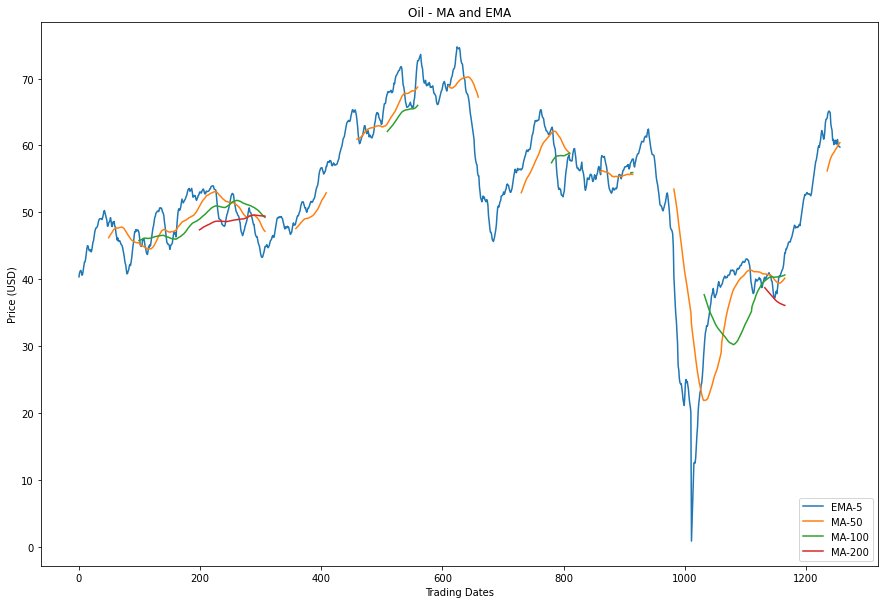

In [74]:
plt.figure(figsize=(15, 10))
plt.title('Oil - MA and EMA')
plt.plot(df.index, df[['EMA-5','MA-50', 'MA-100', 'MA-200']])
# plt.plot(df['EMA-5'])
# plt.plot(df['MA-50'])
# plt.plot(df['MA-100'])
# plt.plot(df['MA-200'])
plt.xlabel('Trading Dates')
plt.ylabel('Price (USD)')
plt.legend(('EMA-5', 'MA-50', 'MA-100', 'MA-200'), loc='lower right')
plt.show()